In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#enter dataset
dataset = pd.read_csv("out.csv", index_col ="Crop")
print(dataset.head(5))
print(dataset.shape)

# to extract important crops
imp_rows = dataset.loc[["Rice","Maize","Moong(Green Gram)","Urad","Sesamum","Coconut","Wheat"]]
print(imp_rows)

# drop or delete the unnecessary columns in the data. 
clean_data_1 = imp_rows.drop(['State','Year','Index'], axis = 1) 
print(clean_data_1)
clean_data_1.to_csv('random_forest_test.csv')

#enter dataset
dataset_new_1 = pd.read_csv("random_forest_test.csv")
print(dataset_new_1.shape)
dataset_new = dataset_new_1.dropna()
print(dataset_new.head(10))
print(dataset_new.shape)

#to check data types
data_type = dataset_new.dtypes
print(data_type)

# statistical parameters
stats = dataset_new.describe()
print(stats)

                     Index                        State  Year       Season  \
Crop                                                                         
Arecanut                 0  Andaman and Nicobar Islands  2000  Kharif        
Other Kharif pulses      1  Andaman and Nicobar Islands  2000  Kharif        
Rice                     2  Andaman and Nicobar Islands  2000  Kharif        
Banana                   3  Andaman and Nicobar Islands  2000  Whole Year    
Cashewnut                4  Andaman and Nicobar Islands  2000  Whole Year    

                       Area  Production  Rainfall  
Crop                                               
Arecanut             1254.0      2000.0    2763.2  
Other Kharif pulses     2.0         1.0    2763.2  
Rice                  102.0       321.0    2763.2  
Banana                176.0       641.0    2763.2  
Cashewnut             720.0       165.0    2763.2  
(74975, 7)
          Index                        State    Year       Season      Area  \

C:\Users\DEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


<Figure size 1440x1440 with 0 Axes>

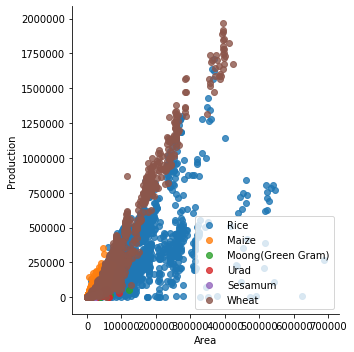

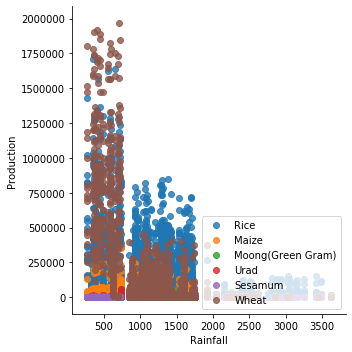

In [2]:
# scatterplot with categorical variable
plt.figure(figsize=(20,20))
sns.lmplot( x="Area", y="Production", data=dataset_new, fit_reg=False, hue='Crop', legend=False) 
plt.legend(loc='lower right') 
plt.show()

# scatterplot with categorical variable
sns.lmplot( x="Rainfall", y="Production", data=dataset_new, fit_reg=False, hue='Crop', legend=False) 
plt.legend(loc='lower right') 
plt.show()



<Figure size 1440x1440 with 0 Axes>

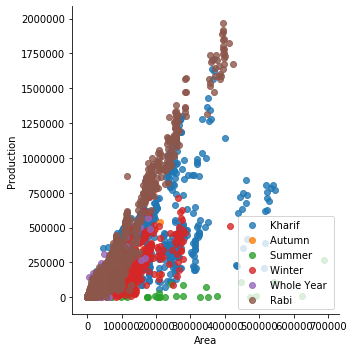

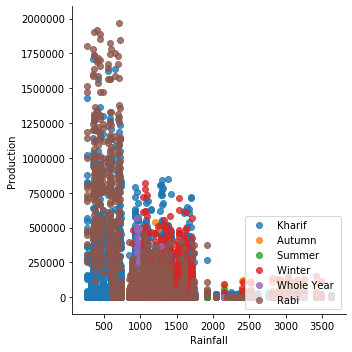

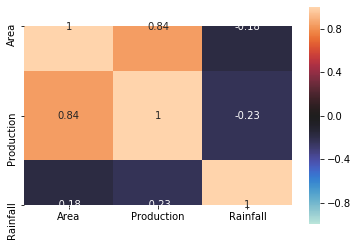

In [14]:
# scatterplot with categorical variable
plt.figure(figsize=(20,20))
sns.lmplot( x="Area", y="Production", data=dataset_new, fit_reg=False, hue='Season', legend=False) 
plt.legend(loc='lower right') 
plt.show()

# scatterplot with categorical variable
sns.lmplot( x="Rainfall", y="Production", data=dataset_new, fit_reg=False, hue='Season', legend=False) 
plt.legend(loc='lower right') 
plt.show()

# correlation and heat maps for the data
correlation = clean_data_1.corr()

ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0, annot=True,
    square=True
)


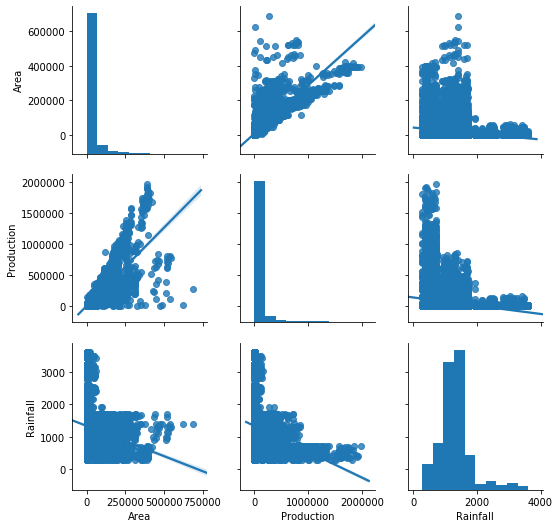

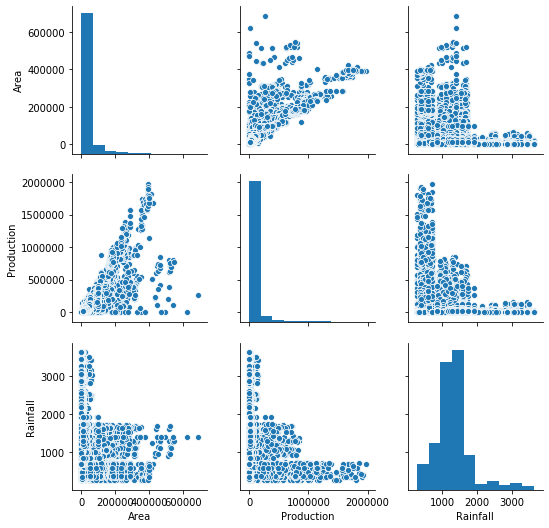

In [4]:
#scatter and regression check for all the data set

sns.pairplot(dataset_new, kind="reg")
plt.show()

sns.pairplot(dataset_new, kind="scatter")
plt.show()

In [5]:
#prediction for rice
rice_pre = dataset.loc[["Rice"]]
print(rice_pre)

       Index                        State  Year       Season      Area  \
Crop                                                                     
Rice       2  Andaman and Nicobar Islands  2000  Kharif         102.00   
Rice      12  Andaman and Nicobar Islands  2001  Kharif          83.00   
Rice      18  Andaman and Nicobar Islands  2002  Kharif         189.20   
Rice      27  Andaman and Nicobar Islands  2003  Kharif          52.00   
Rice      36  Andaman and Nicobar Islands  2004  Kharif          52.94   
...      ...                          ...   ...          ...       ...   
Rice  236383                  Uttarakhand  2011  Kharif       10619.00   
Rice  236407                  Uttarakhand  2012  Kharif        9919.00   
Rice  236428                  Uttarakhand  2013  Kharif        9010.00   
Rice  236454                  Uttarakhand  2014  Kharif        9919.00   
Rice  236475                  Uttarakhand  2014  Whole Year    9919.00   

      Production  Rainfall  
Crop    

In [6]:
# seperating attributes and labels
X = rice_pre[['Area','Rainfall']].values
Y = rice_pre['Production'].values
print(X)
print(Y)

[[ 102.  2763.2]
 [  83.  3080.9]
 [ 189.2 2620.2]
 ...
 [9010.  1735.4]
 [9919.  1287.4]
 [9919.  1287.4]]
[  321.     300.     510.84 ... 15981.   16499.   16499.  ]


In [1]:

# checking avg of rainfall column
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset_new['Production'])

#splitting data set in two parts 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

#training the model by regression algo
reg_data = LinearRegression()
reg_data.fit(X_train, Y_train)

NameError: name 'plt' is not defined

In [8]:
# finding coeff of the corresponding input.....B1,B2,B3,B4
coeff_data = pd.DataFrame(reg_data.coef_)
print(coeff_data)

#prediction using test data set
Y_prediction = reg_data.predict(X_test)

#comparing actual and predicted data
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_prediction.flatten()})
print(df)


           0
0   1.882672
1 -30.456584
        Actual      Predicted
0        192.0   11017.045900
1      70708.0  148167.049666
2     295392.0  194194.827072
3     129942.0  185150.092247
4        887.0   21104.184897
...        ...            ...
1154  285510.0  338226.951525
1155  152083.0  157910.448696
1156    9263.0   34757.977585
1157    6210.0  -34105.033355
1158      70.0   17234.788969

[1159 rows x 2 columns]


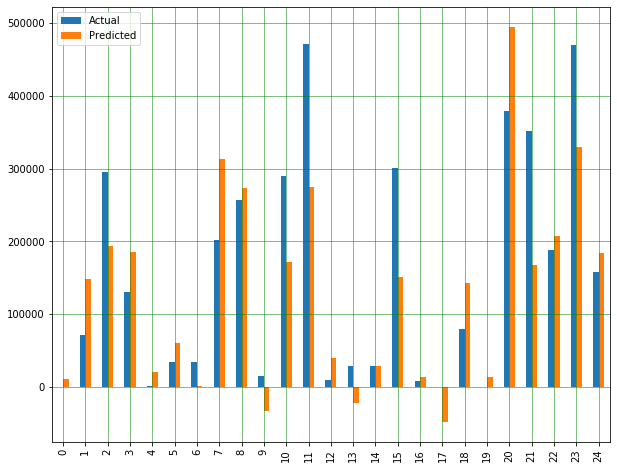

In [9]:

# graphical comparision of predicted and actual
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

        Index              State  Year       Season     Area  Production  \
Crop                                                                       
Wheat    9834  Arunachal Pradesh  2004  Rabi            30.0        60.0   
Wheat    9843  Arunachal Pradesh  2005  Rabi            32.0        65.0   
Wheat    9852  Arunachal Pradesh  2006  Rabi            34.0        73.0   
Wheat    9862  Arunachal Pradesh  2007  Rabi            30.0        48.0   
Wheat    9872  Arunachal Pradesh  2008  Rabi            30.0        49.0   
...       ...                ...   ...          ...      ...         ...   
Wheat  236372        Uttarakhand  2010  Rabi         12126.0     20489.0   
Wheat  236395        Uttarakhand  2011  Rabi         11503.0     18907.0   
Wheat  236417        Uttarakhand  2012  Rabi         10584.0     18387.0   
Wheat  236440        Uttarakhand  2013  Rabi         10023.0     17874.0   
Wheat  236470        Uttarakhand  2014  Rabi          9961.0     13643.0   

       Rain

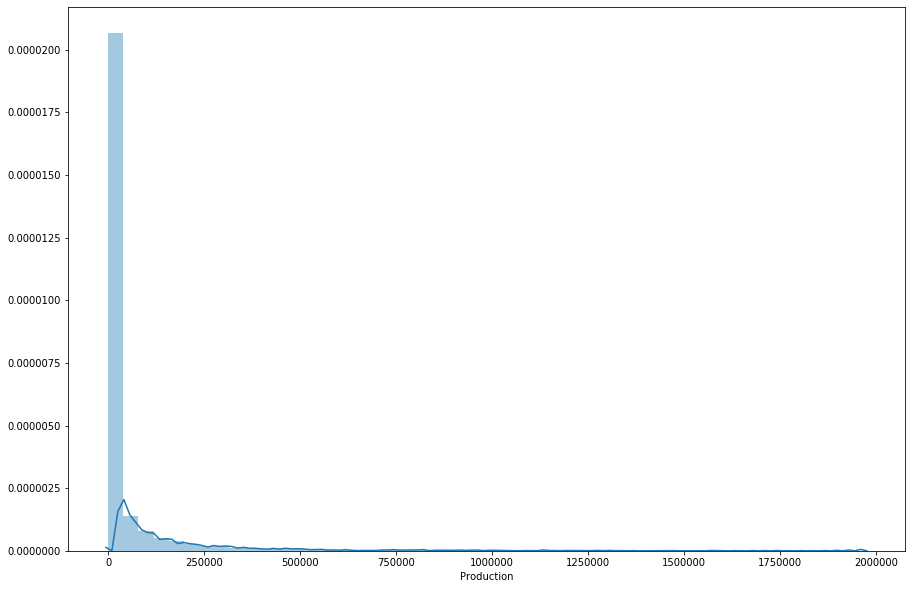

In [10]:
#prediction for rice
rabi_pre = dataset.loc[["Wheat"]]
print(rabi_pre)

# seperating attributes and labels
X = rabi_pre[['Area','Rainfall']].values
Y = rabi_pre['Production'].values
print(X)
print(Y)

# checking avg of rainfall column
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset_new['Production'])




In [11]:


#splitting data set in two parts 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)

#training the model by regression algo
reg_data = LinearRegression()
reg_data.fit(X_train, Y_train)



[[ 2785.    956.6]
 [84690.   1032.4]
 [ 5221.   1420. ]
 ...
 [88112.   1052.8]
 [91888.   1052.8]
 [  262.   1503.4]]
[[4.2173e+04 1.1789e+03]
 [1.1400e+05 4.4100e+02]
 [8.3000e+01 1.3571e+03]
 ...
 [1.8300e+02 2.1937e+03]
 [3.9075e+04 1.3539e+03]
 [9.7500e+02 9.0630e+02]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

          0
0  4.361482
1  7.924832
       Actual      Predicted
0     45430.0  138118.682580
1    538000.0  445543.104054
2        82.0  -44043.882424
3    167720.0  252769.795414
4     29105.0  103960.779977
..        ...            ...
512  141538.0  300784.403246
513  203000.0  198912.715612
514     354.0  -36977.819547
515   34720.0  125993.657529
516    1521.0  -43725.955031

[517 rows x 2 columns]


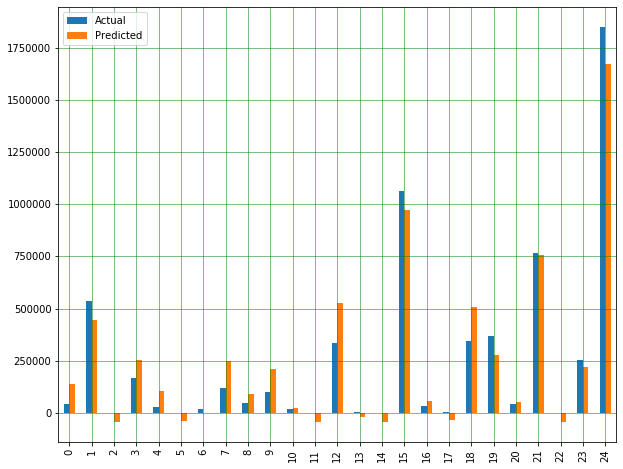

In [12]:
# finding coeff of the corresponding input.....B1,B2,B3,B4
coeff_data = pd.DataFrame(reg_data.coef_)
print(coeff_data)

#prediction using test data set
Y_prediction = reg_data.predict(X_test)

#comparing actual and predicted data
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_prediction.flatten()})
print(df)


# graphical comparision of predicted and actual
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()